#Cat And Dog classification

In [ ]:
train_dir ='/content/drive/My Drive/data/working_directory/train'
validation_dir = '/content/drive/My Drive/data/working_directory/validation'
test_dir = '/content/drive/My Drive/data/working_directory/test'

train_cats_dir = '/content/drive/My Drive/data/working_directory/train/cats'
 
train_dogs_dir = '/content/drive/My Drive/data/working_directory/train/dogs'    

validation_cats_dir = '/content/drive/My Drive/data/working_directory/validation/cats'


validation_dogs_dir = '/content/drive/My Drive/data/working_directory/validation/dogs'

test_dogs_dir = '/content/drive/My Drive/data/working_directory/test/dogs '

test_cats_dir = '/content/drive/My Drive/data/working_directory/test/cats'

In [ ]:
test_cats_dir

'/content/drive/My Drive/data/working_directory/test/cats'

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Building your network
 
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size = 20,class_mode='binary')
 
 
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150)
                                                        ,batch_size=20,
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', len(labels_batch))
    break
    
    # print(labels_batch)
    

data batch shape: (20, 150, 150, 3)
labels batch shape: 20


In [ ]:
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,
                              validation_data=validation_generator,validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 1069s 11s/step - loss: 0.6842 - acc: 0.5500 - val_loss: 0.6682 - val_acc: 0.5420
Epoch 2/30
100/100 [==============================] - 11s 111ms/step - loss: 0.6445 - acc: 0.6190 - val_loss: 0.6739 - val_acc: 0.5420
Epoch 3/30
100/100 [==============================] - 11s 110ms/step - loss: 0.5894 - acc: 0.6950 - val_loss: 0.5988 - val_acc: 0.6690
Epoch 4/30
100/100 [==============================] - 11s 110ms/step - loss: 0.5565 - acc: 0.7225 - val_loss: 0.5848 - val_acc: 0.6750
Epoch 5/30
100/100 [==============================] - 11s 111ms/step - loss: 0.5268 - acc: 0.7320 - val_loss: 0.6376 - val_acc: 0.6670
Epoch 6/30
100/100 [==============================] - 11s 111ms/step - loss: 0.5039 - acc: 0.7465 - val_loss: 0.5815 - val_acc: 0.6890
Epoch 7/30
100/100 [==============================] - 11s 111ms/step - loss: 0.4819 - acc: 0.7770 - val_loss: 0.57

In [ ]:
model.save('cats_and_dogs_small_1.h5')

In [ ]:
datagen = ImageDataGenerator(rotation_range=40,width_shift_range=0.2
                             ,height_shift_range=0.2,shear_range=0.2,
                             zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

In [ ]:
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
fnames
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
# print(np.asarray(img))
x = image.img_to_array(img)
print(x)
# print(x[0:1,0:1,0])
# print(x[0:1,0:1,1])
# print(x[0:1,0:1,2])
# print(x[0:1,0:1,:])


[[[222. 223. 218.]
  [223. 224. 219.]
  [223. 224. 219.]
  ...
  [240. 241. 246.]
  [234. 235. 240.]
  [247. 244. 251.]]

 [[219. 220. 215.]
  [222. 223. 218.]
  [224. 225. 220.]
  ...
  [243. 244. 249.]
  [234. 235. 240.]
  [239. 242. 247.]]

 [[226. 227. 222.]
  [224. 225. 220.]
  [223. 224. 219.]
  ...
  [242. 243. 248.]
  [241. 242. 247.]
  [232. 240. 243.]]

 ...

 [[207. 210. 215.]
  [207. 213. 213.]
  [206. 212. 208.]
  ...
  [215. 212. 207.]
  [215. 212. 207.]
  [217. 212. 209.]]

 [[219. 212. 220.]
  [211. 209. 212.]
  [206. 206. 204.]
  ...
  [215. 212. 207.]
  [215. 212. 207.]
  [217. 212. 209.]]

 [[213. 217. 226.]
  [206. 212. 212.]
  [206. 208. 203.]
  ...
  [214. 210. 207.]
  [215. 212. 205.]
  [217. 211. 211.]]]


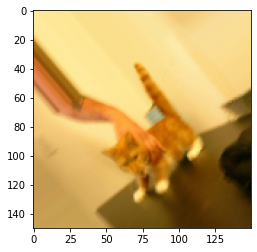

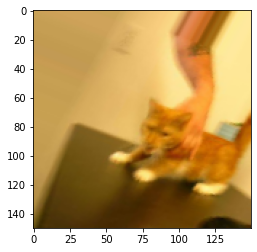

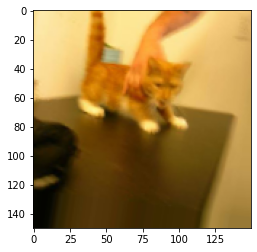

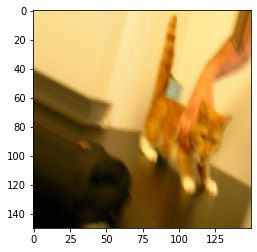

In [ ]:

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[2]
img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
img
# print(x[0:1,0:1,:])
x = x.reshape( (1,) + x.shape)
# print(x.shape)
# print(x)
i=0
for batch in datagen.flow(x, batch_size=2):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

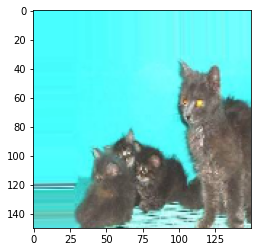

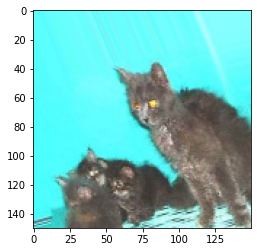

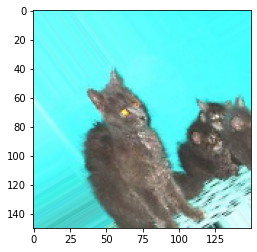

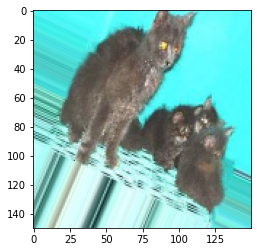

In [ ]:
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[4]
img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1 
    if i % 4 == 0:
        break
plt.show()


In [ ]:
# print(fnames[4])
# print(img_path[4])

img

# print(y.shape)
# y


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
print(x.shape)
(1,) + x.shape

(150, 150, 3)


(1, 150, 150, 3)

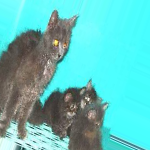

In [ ]:
image.array_to_img(batch[0])

In [ ]:



model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2
                                   ,shear_range=0.2,zoom_range=0.2
                                   ,horizontal_flip=True,)


test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),
                                                    batch_size=32,class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 150),
                                                        batch_size=32,
                                                        class_mode='binary')



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=100,
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/100
100/100 [==============================] - 334s 3s/step - loss: 33.1988 - acc: 0.5258 - val_loss: 20.9244 - val_acc: 0.5647
Epoch 2/100
100/100 [==============================] - 296s 3s/step - loss: 12.5250 - acc: 0.5237 - val_loss: 5.7351 - val_acc: 0.5793
Epoch 3/100
100/100 [==============================] - 303s 3s/step - loss: 2.5550 - acc: 0.5410 - val_loss: 1.0018 - val_acc: 0.5590
Epoch 4/100
100/100 [==============================] - 262s 3s/step - loss: 0.9238 - acc: 0.5786 - val_loss: 0.8767 - val_acc: 0.5850
Epoch 5/100
100/100 [==============================] - 258s 3s/step - loss: 0.8780 - acc: 0.5747 - val_loss: 0.8671 - val_acc: 0.5349
Epoch 6/100
100/100 [==============================] - 256s 3s/step - loss: 0.8588 - acc: 0.5710 - val_loss: 0.8377 - val_acc: 0.5996
Epoch 7/100
100/100 [==============================] - 265s 3s/step - loss: 0.8494 - acc: 0.5704 - val_loss: 0.8477 - val_acc: 0.5590
Epoch 8/100
100/100 [==============================] - 336s

Epoch 62/100
100/100 [==============================] - 299s 3s/step - loss: 0.7540 - acc: 0.7038 - val_loss: 0.7524 - val_acc: 0.7107
Epoch 63/100
100/100 [==============================] - 398s 4s/step - loss: 0.7456 - acc: 0.7134 - val_loss: 0.7655 - val_acc: 0.7069
Epoch 64/100
100/100 [==============================] - 327s 3s/step - loss: 0.7527 - acc: 0.7001 - val_loss: 0.7621 - val_acc: 0.7119
Epoch 65/100
100/100 [==============================] - 311s 3s/step - loss: 0.7489 - acc: 0.7086 - val_loss: 0.7502 - val_acc: 0.7157
Epoch 66/100
100/100 [==============================] - 296s 3s/step - loss: 0.7458 - acc: 0.7030 - val_loss: 0.7962 - val_acc: 0.6624
Epoch 67/100
100/100 [==============================] - 293s 3s/step - loss: 0.7525 - acc: 0.7105 - val_loss: 0.7537 - val_acc: 0.7043
Epoch 68/100
100/100 [==============================] - 317s 3s/step - loss: 0.7507 - acc: 0.7104 - val_loss: 0.7679 - val_acc: 0.6859
Epoch 69/100
100/100 [==============================] -

In [ ]:
model.save('cats_and_dogs_small_2.h5')


ADDING TWO DROPOUT LAYERS


In [ ]:
# Building your network
 
from tensorflow.keras import layers
from tensorflow.keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
datagen = ImageDataGenerator(rotation_range=40,width_shift_range=0.2
                             ,height_shift_range=0.2,shear_range=0.2,
                             zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

In [ ]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2
                                   ,shear_range=0.2,zoom_range=0.2
                                   ,horizontal_flip=True,)


test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),
                                                    batch_size=32,class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 150),
                                                        batch_size=32,
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 1048s 10s/step - loss: 0.6943 - acc: 0.5047 - val_loss: 0.6873 - val_acc: 0.5038
Epoch 2/30
100/100 [==============================] - 31s 312ms/step - loss: 0.6820 - acc: 0.5502 - val_loss: 0.6618 - val_acc: 0.6063
Epoch 3/30
100/100 [==============================] - 32s 316ms/step - loss: 0.6709 - acc: 0.5861 - val_loss: 0.6491 - val_acc: 0.6193
Epoch 4/30
100/100 [==============================] - 31s 313ms/step - loss: 0.6568 - acc: 0.6048 - val_loss: 0.7796 - val_acc: 0.5103
Epoch 5/30
100/100 [==============================] - 32s 316ms/step - loss: 0.6425 - acc: 0.6247 - val_loss: 0.6135 - val_acc: 0.6624
Epoch 6/30
100/100 [==============================] - 31s 315ms/step - loss: 0.6278 - acc: 0.6578 - val_loss: 0.6101 - val_acc: 0.6540
Epoch 7/30
100/100 [==============================] - 32s 319ms/step - loss: 0.6089 - acc: 0.6657 - val_loss: 0.58

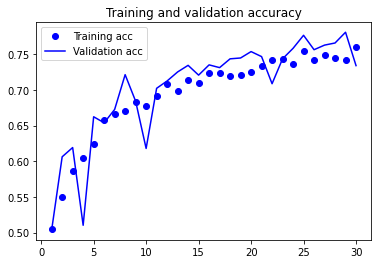

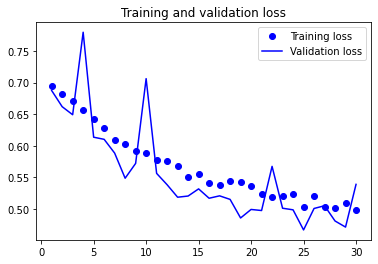

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
model.save("/content/drive/My Drive/data/cats_and_dogs_small_3.h5")

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(8, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 8)       224       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 16)      1168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 69, 69, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 34, 34, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 64)        1

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


In [ ]:
history_3 = model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 1025s 10s/step - loss: 0.6872 - acc: 0.5421 - val_loss: 0.6655 - val_acc: 0.5984
Epoch 2/30
100/100 [==============================] - 33s 332ms/step - loss: 0.6738 - acc: 0.5906 - val_loss: 0.6625 - val_acc: 0.5921
Epoch 3/30
100/100 [==============================] - 34s 336ms/step - loss: 0.6656 - acc: 0.6043 - val_loss: 0.6732 - val_acc: 0.5647
Epoch 4/30
100/100 [==============================] - 33s 334ms/step - loss: 0.6586 - acc: 0.6070 - val_loss: 0.6602 - val_acc: 0.5883
Epoch 5/30
100/100 [==============================] - 34s 336ms/step - loss: 0.6327 - acc: 0.6442 - val_loss: 0.6672 - val_acc: 0.5996
Epoch 6/30
100/100 [==============================] - 33s 332ms/step - loss: 0.6269 - acc: 0.6449 - val_loss: 0.6787 - val_acc: 0.5902
Epoch 7/30
100/100 [==============================] - 33s 330ms/step - loss: 0.6210 - acc: 0.6572 - val_loss: 0.58

In [ ]:
acc = history_3.history['acc']
val_acc = history_3.history['val_acc']
loss = history_3.history['loss']
val_loss = history_3.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

NameError: ignored

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(150, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.Conv2D(148, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten()) 
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


NameError: ignored

In [ ]:
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=100,
                              validation_data=validation_generator,
                              validation_steps=50)

In [ ]:
# for i in range(10):
#   aa= np.array(range(100))
#   aa=aa.reshape(2,5,5)
#   a=np.arange(100)
#   a=a.reshape(2,5,5)
#   print(a)
#   print(aa)
#   aa[0:10] = a
#   print(a)
#   print(aa)
#   break
labels = np.zeros(shape=(sample_count))

labels[0 : 20] = labels_batch

ValueError: ignored